# Computational photography
## Image denoising
### Theory
Smoothing techniques like Gaussian blurring, Median blurring etc. are good to remove small quantities of noise.  
Noise is supposed to be a random variable with zero mean that if a number of same pixels are gathered from different images and taken their average, ideally the noise of the pixel is close to zero. For example, holding a static camera to a certain location for a couple of seconds, we obtain plenty of frames.  
As another method, similar patches in an image can be taken their average. This method is Non-Local Means Denoising and can get good result.
### Image denoising in OpenCV
OpenCV provides four methods.
1. `cv2.fastNlMeansDenoising()`
1. `cv2.fastNlMeansDenoisingColored()`
1. `cv2.fastNlMeansDenoisingMulti()`
1. `cv2.fastNlMeansDenoisingColoredMulti()`
Common arguments are:
- h: parameter deciding filter strength. Higher h value removes noise better, but removes details of image. (10 is ok)
- hColor: h for color images
- templateWindowSize: 7 by default
- searchWindowSize: 21 by default

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

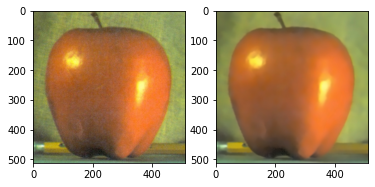

In [6]:
img = cv2.imread('inputs/apple.jpeg')

dst = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(dst)
plt.show()

Now apply to multiple images. Second argument sepcifies which frame is denoised. Third argument specifies the number of nearby frames to be used for denoising.

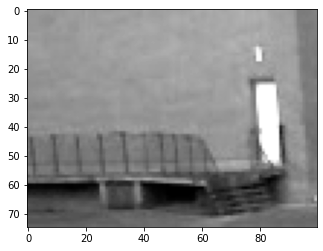

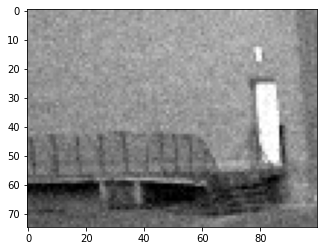

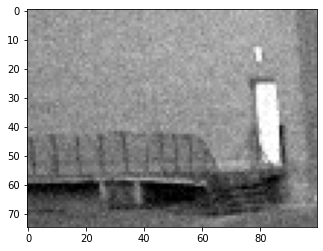

In [15]:
cap = cv2.VideoCapture('inputs/vtest.avi')

# create a list of first 5 frames
img = [cap.read()[1] for i in range(5)]
cap.release()
gray = [cv2.cvtColor(i, cv2.COLOR_BGR2GRAY) for i in img]
gray = [np.float64(i) for i in gray]

# create a noise
noise = np.random.randn(*gray[1].shape) * 10

# add noise to images
noisy = [i + noise for i in gray]
noisy = [np.uint8(np.clip(i, 0, 255)) for i in noisy]

# denoise 3rd frame considering all the 5 frames
dst = cv2.fastNlMeansDenoisingMulti(noisy, 2, 5, None, 4, 7, 35)

plt.imshow(gray[2][:75, :100], 'gray')
plt.show()
plt.imshow(noisy[2][:75, :100], 'gray')
plt.show()
plt.imshow(dst[:75, :100], 'gray')
plt.show()

## Image Inpainting
When an image is degraded with some black spots or some strokes etc. on it, image inpainting replace those bad marks with its neighboring pixels. OpenCV provides two algorihms and both of them can be accessed by `cv2.inpaint()`.

First algorithm (flag=`cv2.INPAINT_TELEA`) is based on Fast Marching Method. Algorithm starts from the boundary of the region and goes inside the region gradually filling everything. The pixel is replaced by normalized weighted sum of all the known pixels in the neighborfood. Selection of the weights is an important matter, more weightage is given to those pixels lying near to the point, near to the normal of the boundary and those lying on the boundary contours. Once a pixel is inpainted, it moves to next nearest pixel using Fast Marching Method.

Second algorithm (flag=`cv2.INPAINT_NS`) utilizes partial differential equations. First, it travels along the edges from known regions to unknown regions. It continues isophotes while matching gradient vectors at the boundary of the inpainting region. Once they are obtained, color is filled to reduce minimum variance in that area.

### Code
A mask of same size as that of input image have to be created. Non-zero pixels corresponds to the area are to be inpainted.

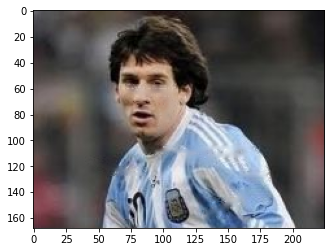

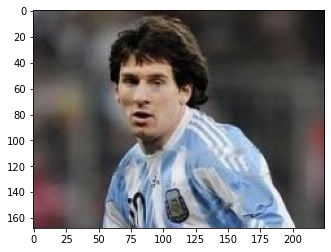

In [26]:
img = cv2.imread('inputs/messi_2.png')
mask = cv2.imread('inputs/mask2.png', 0)

dst = cv2.inpaint(img, mask, 3, cv2.INPAINT_TELEA)
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.imshow(dst)
plt.show()

dst2 = cv2.inpaint(img, mask, 3, cv2.INPAINT_NS)
dst2 = cv2.cvtColor(dst2, cv2.COLOR_BGR2RGB)
plt.imshow(dst2)
plt.show()